In [6]:
from platform import python_version

print('Versão Jupyter Notebook neste projeto:', python_version())

Versão Jupyter Notebook neste projeto: 3.8.10


In [7]:
import unicodedata
import sys
import string
import time
import csv
import nltk
import re

import numpy as np
import pandas as pd
import seaborn as sns
import warnings

from pylab import rcParams
import matplotlib.pyplot as plt
import matplotlib as m
import matplotlib as mpl

In [8]:
%reload_ext watermark
%watermark -a "Rafael Gallo" --iversions

Author: Rafael Gallo

matplotlib: 3.3.4
seaborn   : 0.11.1
csv       : 1.0
pandas    : 1.2.4
sys       : 3.8.10 (default, May 19 2021, 13:12:57) [MSC v.1916 64 bit (AMD64)]
nltk      : 3.6.2
re        : 2.2.1
numpy     : 1.20.2



In [9]:
warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')
m.rcParams['axes.labelsize'] = 14
m.rcParams['xtick.labelsize'] = 12
m.rcParams['ytick.labelsize'] = 12
m.rcParams['text.color'] = 'k'
rcParams['figure.figsize'] = 18, 8

In [10]:
import nltk
import re

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
nltk.download("stopwords")
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\rafael.gallo_gentrop\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rafael.gallo_gentrop\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rafael.gallo_gentrop\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
data = pd.read_csv("tripadvisor_hotel_reviews.csv", sep=",")
data.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [12]:
data.tail()

,Review,Rating
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1
20490,"people talking, ca n't believe excellent ratin...",2


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [14]:
data.dtypes

Review    object
Rating     int64
dtype: object

In [15]:
data.shape

(20491, 2)

In [16]:
def sentimentos(Review):
    if Review >= 3:
        return 1
    else:
        return 0

data["Sentimento"] = data["Rating"].apply(sentimentos)
data.head()

,Review,Rating,Sentimento
0,nice hotel expensive parking got good deal sta...,4,1
1,ok nothing special charge diamond member hilto...,2,0
2,nice rooms not 4* experience hotel monaco seat...,3,1
3,"unique, great stay, wonderful time hotel monac...",5,1
4,"great stay great stay, went seahawk game aweso...",5,1


In [17]:
data.Review.count()

20491

In [18]:
data.value_counts

<bound method DataFrame.value_counts of                                                   Review  Rating  Sentimento
0      nice hotel expensive parking got good deal sta...       4           1
1      ok nothing special charge diamond member hilto...       2           0
2      nice rooms not 4* experience hotel monaco seat...       3           1
3      unique, great stay, wonderful time hotel monac...       5           1
4      great stay great stay, went seahawk game aweso...       5           1
...                                                  ...     ...         ...
20486  best kept secret 3rd time staying charm, not 5...       5           1
20487  great location price view hotel great quick pl...       4           1
20488  ok just looks nice modern outside, desk staff ...       2           0
20489  hotel theft ruined vacation hotel opened sept ...       1           0
20490  people talking, ca n't believe excellent ratin...       2           0

[20491 rows x 3 columns]>

In [19]:
data.Rating.value_counts

<bound method IndexOpsMixin.value_counts of 0        4
1        2
2        3
3        5
4        5
        ..
20486    5
20487    4
20488    2
20489    1
20490    2
Name: Rating, Length: 20491, dtype: int64>

In [20]:
data.Sentimento.value_counts

<bound method IndexOpsMixin.value_counts of 0        1
1        0
2        1
3        1
4        1
        ..
20486    1
20487    1
20488    0
20489    0
20490    0
Name: Sentimento, Length: 20491, dtype: int64>

# Análise de Sentimento

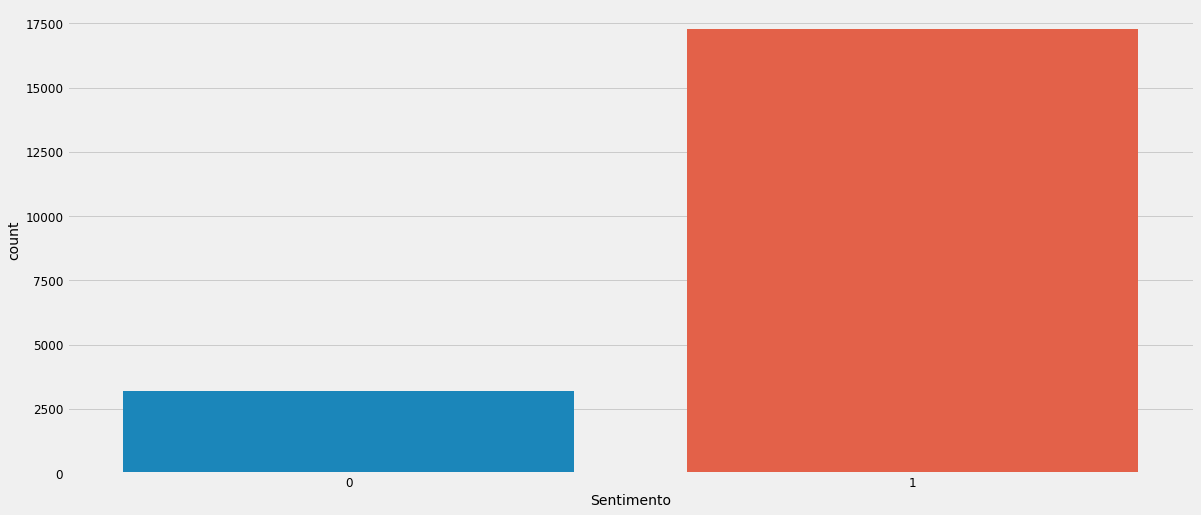

In [21]:
ax = sns.countplot(data["Sentimento"]);

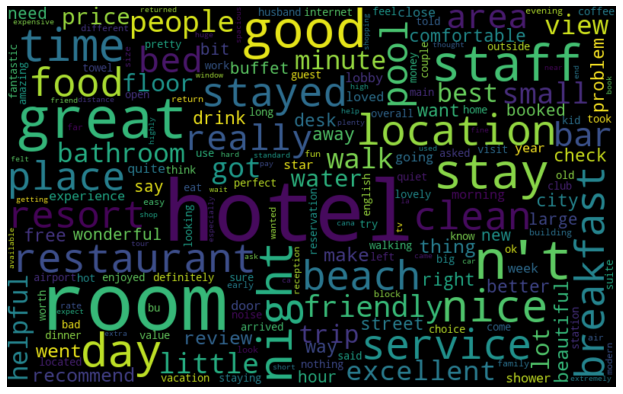

In [22]:
%matplotlib inline
from wordcloud import WordCloud

todos_palavras = ' '.join([texto for texto in data["Review"]])
nuvem_palavras = WordCloud(width = 800, height = 500, max_font_size = 110,
                          collocations = False).generate(todos_palavras)

plt.figure(figsize= (10, 7))
plt.imshow(nuvem_palavras, interpolation = 'bilinear')
plt.axis('off')
plt.show()

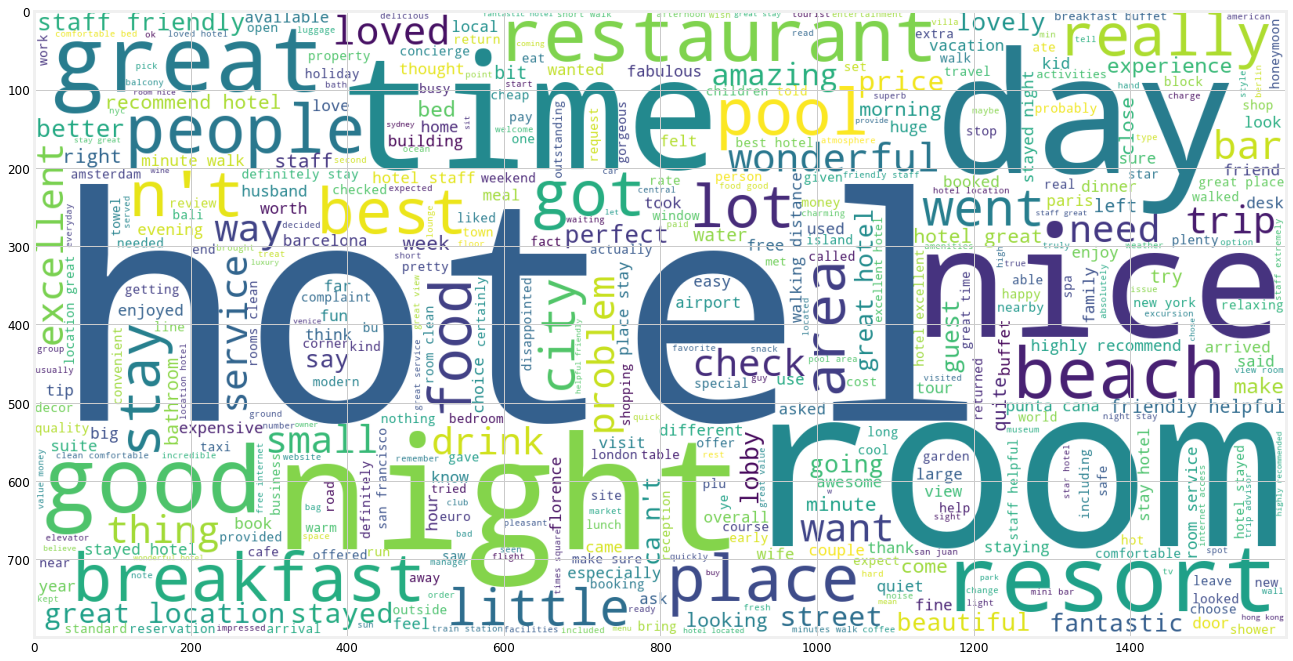

In [23]:
plt.figure(figsize=(20,20))
wc5 = WordCloud(max_words=2000, min_font_size=10, 
                height=800,width=1600,background_color="white").generate(" ".join(data[data["Rating"]==5].Review))
plt.imshow(wc5)

# Pré - processamento

In [24]:
data.Review.count()

20491

In [25]:
# Dados duplicados

data.drop_duplicates(["Review"], inplace = True)
data.Review.count()

20491

In [26]:
treino = data["Review"]
teste = data["Sentimento"]

In [27]:
treino.shape

(20491,)

In [28]:
teste.shape

(20491,)

In [29]:
from nltk.stem import WordNetLemmatizer
word_lemmatizer = WordNetLemmatizer()

def Lemmatization(inst):
    pal = []
    for x in inst.split():
        pal.append(word_lemmatizer.lemmatize(x))
    return (" ".join(pal))

def Preprocessing(inst):
    inst = re.sub(r"http\S+", "", inst).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','').replace('"','')
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    pal = [i for i in inst.split() if not i in stopwords]
    return (" ".join(pal))

def neg(text):
    neg = ["não", "not"]
    neg_dect = False
    
    result = []
    pal = text.split()

    for x in pal:
        x = x.lower()
        if neg_dect == True:
            x = x + "_NEG"
        if x in neg:
            neg_dect = True
        result.append(x)

    return ("".join(result))
    
def stopwords(inst):
    stopwords = set(nltk.corpus.stopwords.words("portuguese"))
    pal = [i for i in inst.split() if not i in stopwords]
    return (" ".join(pal))

def stem(inst):
    stem = nltk.stem.RSLPStemmer()
    pal = []
    for x in inst.split():
        pal.append(stemmer.stem(x))
    return (" ".join(pal))

def dados_limp(inst):
    inst = re.sub(r"http\S+", "", instancia).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','')
    return (inst)

In [30]:
treino = [Preprocessing(i) for i in treino]
treino[:20]

['nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed nonexistent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,',
 'ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bathroom bedroom unlik

In [31]:
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import TweetTokenizer

tokenizer = TweetTokenizer()
vectorizer = CountVectorizer(analyzer="word", tokenizer = tokenizer.tokenize)
freq = vectorizer.fit_transform(treino)
freq

<20491x77627 sparse matrix of type '<class 'numpy.int64'>'
	with 1734728 stored elements in Compressed Sparse Row format>

In [32]:
freq.shape

(20491, 77627)

# Modelo Machine learning 
**Modelo 01 - Naive bayes**

In [33]:
from sklearn.naive_bayes import MultinomialNB

model_naive_bayes = MultinomialNB()
model_naive_bayes_fit = model_naive_bayes.fit(freq, teste)
model_naive_bayes_score = model_naive_bayes.score(freq, teste)

print("Score - Modelo Naive bayes multinomialNB: %.2f" % (model_naive_bayes_score * 100))

Score - Modelo Naive bayes multinomialNB: 95.48


In [34]:
naive_bayes_predict = model_naive_bayes.predict_proba(freq).round(2)
naive_bayes_predict

array([[0.  , 1.  ],
       [1.  , 0.  ],
       [0.01, 0.99],
       ...,
       [0.12, 0.88],
       [1.  , 0.  ],
       [0.08, 0.92]])

In [35]:
naive_bayes_predict = model_naive_bayes.predict(freq)
naive_bayes_predict

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [36]:
from sklearn.metrics import accuracy_score

accuracy_naive_bayes_multinomialNB = accuracy_score(teste, naive_bayes_predict)
print("Accuracy - Naive bayes multinomialNB: %.2f" % (accuracy_naive_bayes_multinomialNB * 100))

Accuracy - Naive bayes multinomialNB: 95.48


In [37]:
from sklearn.metrics import confusion_matrix

matrix_confusion_1 = confusion_matrix(teste, naive_bayes_predict)

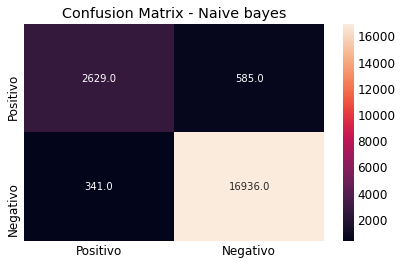

In [38]:
ax= plt.subplot()
sns.heatmap(matrix_confusion_1, annot=True, ax = ax, fmt = ".1f"); 

ax.set_xlabel('');
ax.set_ylabel(''); 
ax.set_title('Confusion Matrix - Naive bayes'); 
ax.xaxis.set_ticklabels(["Positivo", "Negativo"]); ax.yaxis.set_ticklabels(["Positivo", 'Negativo']);

In [39]:
from sklearn.metrics import classification_report

classification = classification_report(teste, naive_bayes_predict)
print("Modelo 01 - Naive bayes multinomialNB")
print()
print(classification)

Modelo 01 - Naive bayes multinomialNB

              precision    recall  f1-score   support

           0       0.89      0.82      0.85      3214
           1       0.97      0.98      0.97     17277

    accuracy                           0.95     20491
   macro avg       0.93      0.90      0.91     20491
weighted avg       0.95      0.95      0.95     20491



In [40]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

precision = precision_score(teste, naive_bayes_predict)
Recall = recall_score(teste, naive_bayes_predict)
Accuracy = accuracy_score(teste, naive_bayes_predict)
F1_Score = f1_score(teste, naive_bayes_predict)

precisao = pd.DataFrame({
    
    "Metricas" : ["precision",
                 "Recall", 
                  "Accuracy", 
                  "F1_Score"],
    
    "Resultado": [precision,
                Recall, 
                Accuracy, 
                F1_Score]})

precisao.sort_values(by = "Resultado", ascending = False)

,Metricas,Resultado
1,Recall,0.980263
3,F1_Score,0.973389
0,precision,0.966611
2,Accuracy,0.954809


# Modelo 02 - Decision Tree

In [46]:
%%time
from sklearn.tree import DecisionTreeClassifier 

model_dtc = DecisionTreeClassifier(max_depth = 4, random_state = 0)
model_dtc_fit = model_dtc.fit(freq, teste)
model_dtc_score = model_dtc.score(freq, teste)
print("Modelo - Decision Tree Classifier: %.2f" % (model_dtc_score * 100))

Modelo - Decision Tree Classifier: 87.56
Wall time: 1.01 s


In [47]:
modelo_arvore_cla_1_predict = model_dtc.predict(freq)
modelo_arvore_cla_1_predict

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [48]:
modelo_arvore_cla_1_prob = model_dtc.predict_proba(freq)
modelo_arvore_cla_1_prob

array([[0.04944552, 0.95055448],
       [0.67142857, 0.32857143],
       [0.34883721, 0.65116279],
       ...,
       [0.17221599, 0.82778401],
       [0.32132132, 0.67867868],
       [0.17221599, 0.82778401]])

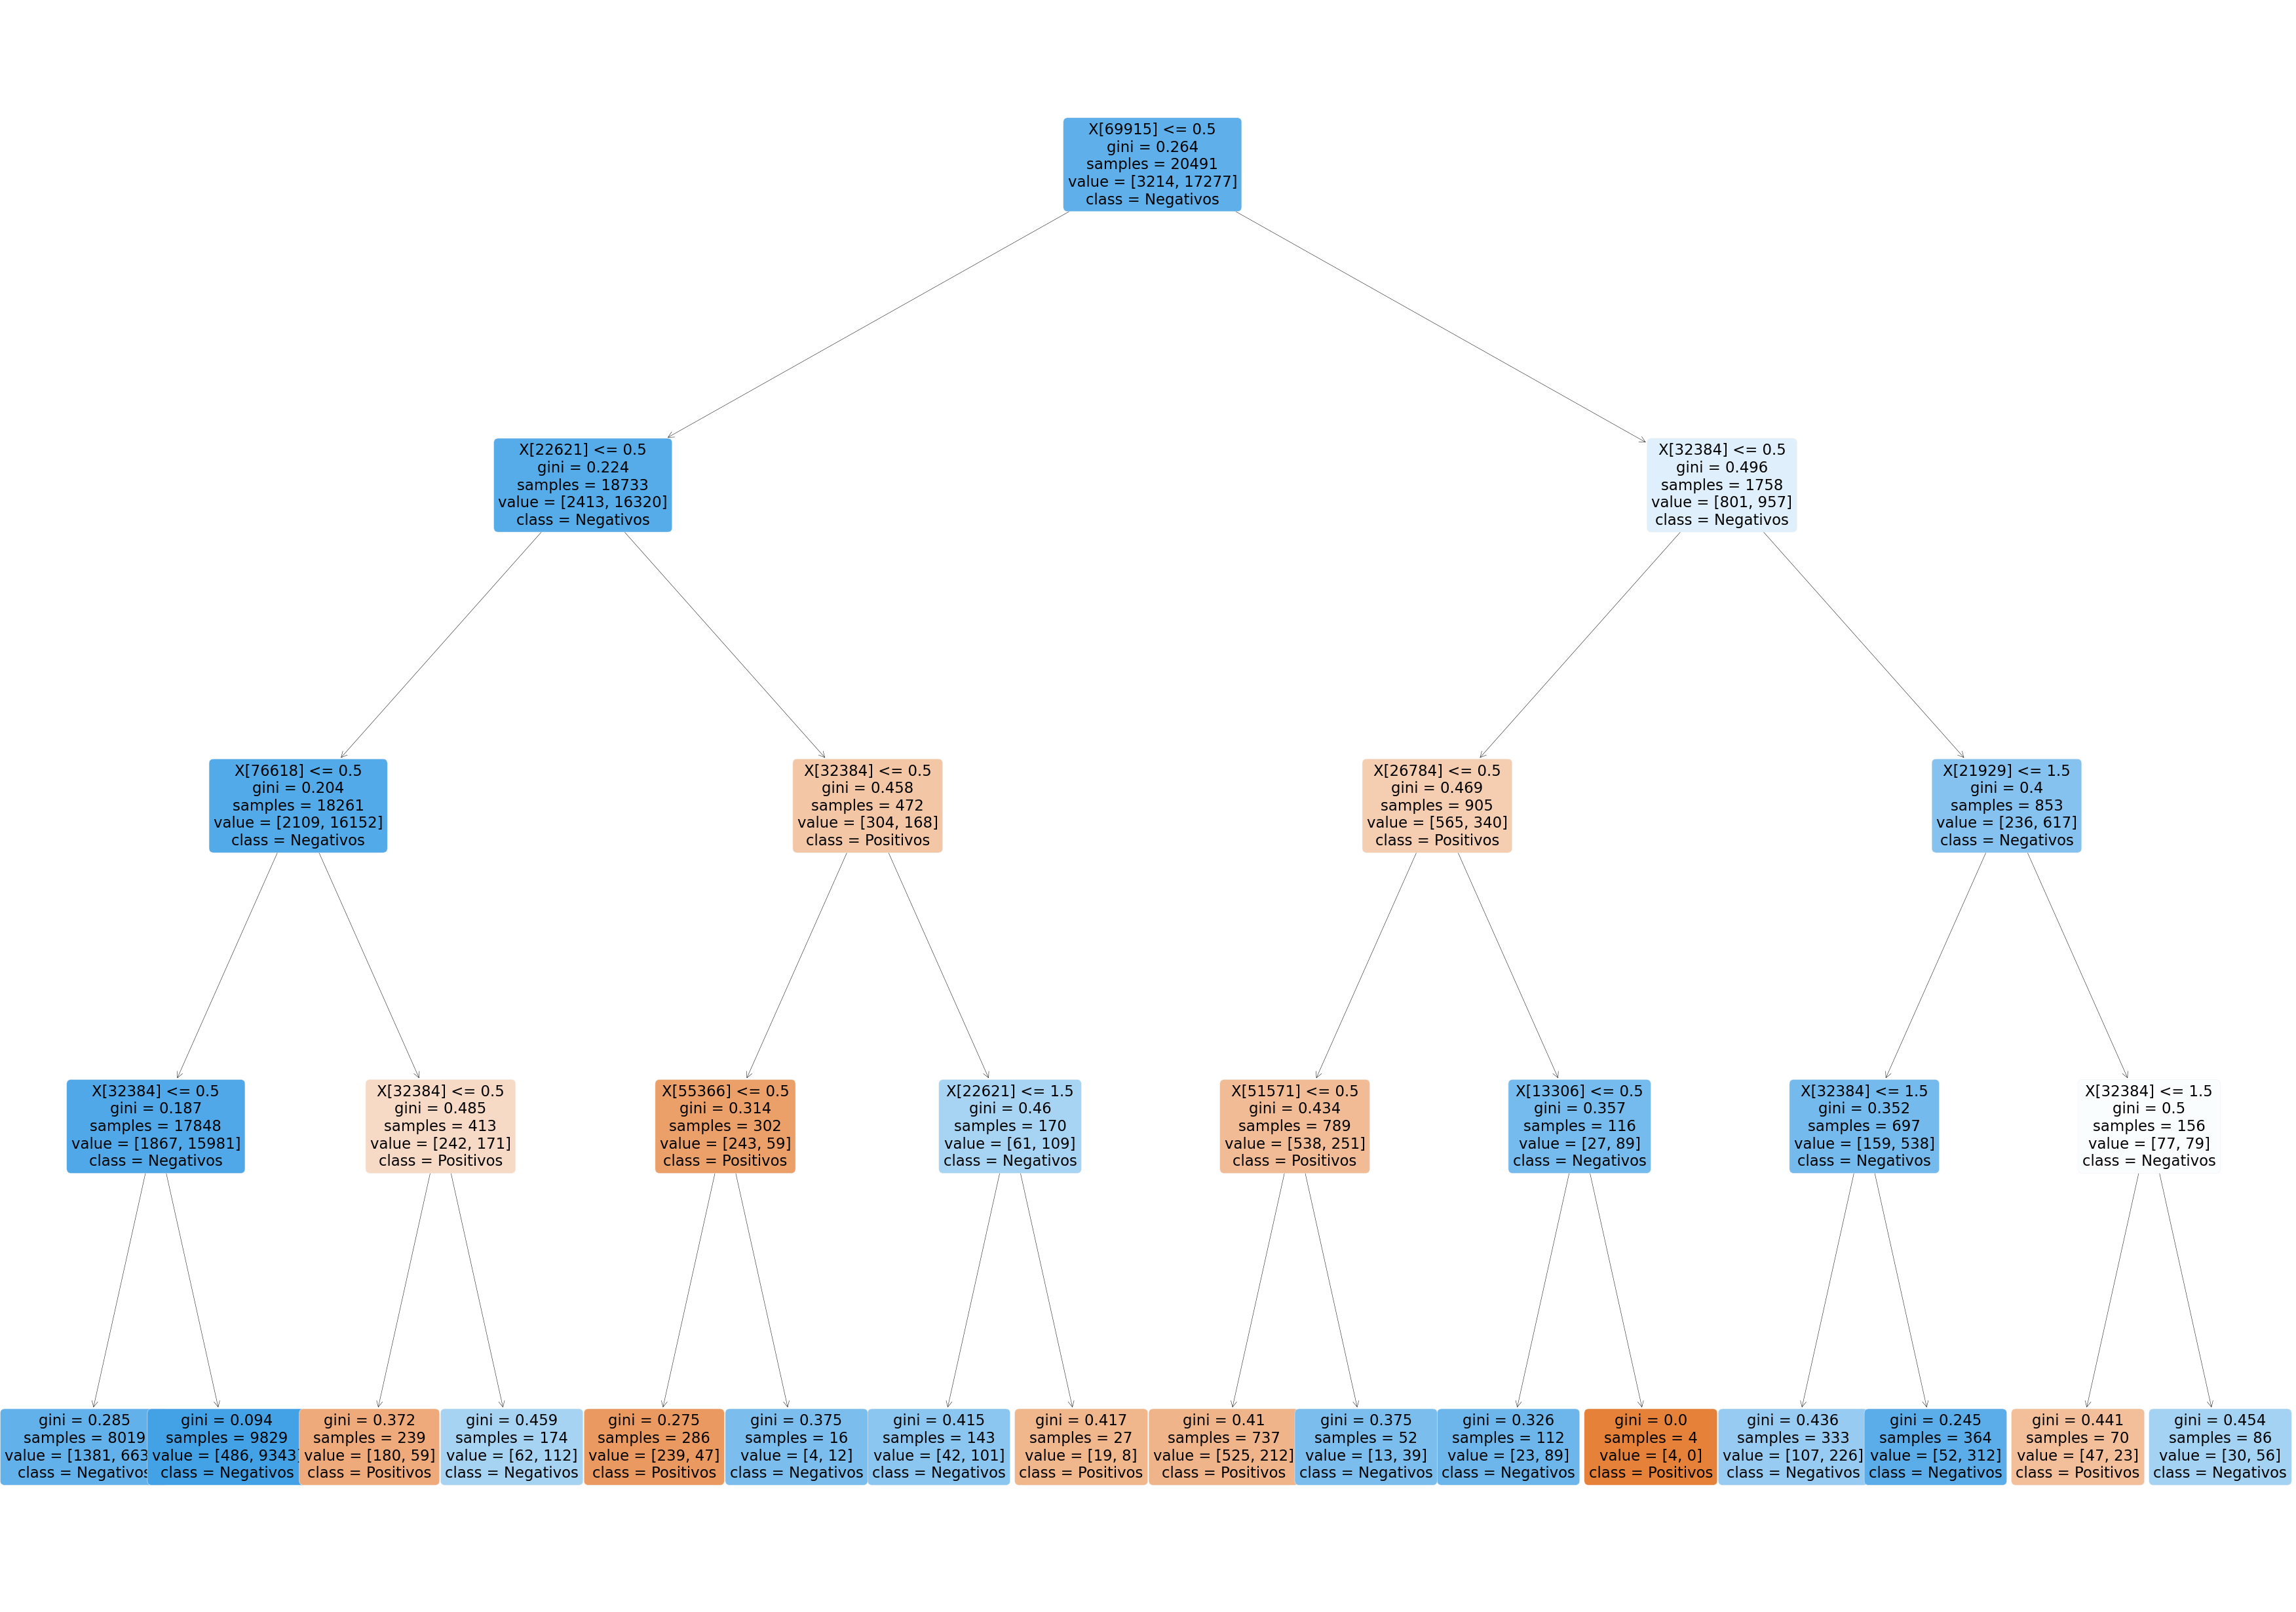

In [51]:
from sklearn import tree

fig, ax = plt.subplots(figsize=(55.5, 45), facecolor = "w")
tree.plot_tree(model_dtc, 
               ax = ax, 
               fontsize = 22.8, 
               rounded = True, 
               filled = True, 
               class_names = ["Positivos", "Negativos"])
plt.show()

In [52]:
acuracia_decision_tree = accuracy_score(teste, modelo_arvore_cla_1_predict)

print("Accuracy - Decision Tree: %.2f" % (acuracia_decision_tree * 100))

Accuracy - Decision Tree: 87.56


In [53]:
matrix_confusion_2 = confusion_matrix(teste, modelo_arvore_cla_1_predict)

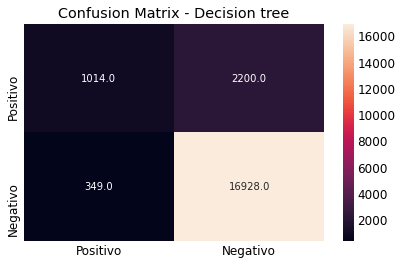

In [56]:
ax= plt.subplot()
sns.heatmap(matrix_confusion_2, annot=True, ax = ax, fmt = ".1f"); 

ax.set_xlabel('');
ax.set_ylabel(''); 
ax.set_title('Confusion Matrix - Decision tree'); 
ax.xaxis.set_ticklabels(["Positivo", "Negativo"]); ax.yaxis.set_ticklabels(["Positivo", 'Negativo']);

In [58]:
class_report = classification_report(teste, modelo_arvore_cla_1_predict)
print("Modelo - Decision Tree")
print("\n")
print(class_report)

Modelo - Decision Tree


              precision    recall  f1-score   support

           0       0.74      0.32      0.44      3214
           1       0.88      0.98      0.93     17277

    accuracy                           0.88     20491
   macro avg       0.81      0.65      0.69     20491
weighted avg       0.86      0.88      0.85     20491



In [59]:
precision = precision_score(teste, modelo_arvore_cla_1_predict)
Recall = recall_score(teste, modelo_arvore_cla_1_predict)
Accuracy = accuracy_score(teste, modelo_arvore_cla_1_predict)
F1_Score = f1_score(teste, modelo_arvore_cla_1_predict)

precisao = pd.DataFrame({
    
    "Metricas" : ["precision",
                 "Recall", 
                  "Accuracy", 
                  "F1_Score"],
    
    "Resultado": [precision,
                Recall, 
                Accuracy, 
                F1_Score]})

precisao.sort_values(by = "Resultado", ascending = False)

,Metricas,Resultado
1,Recall,0.979800
3,F1_Score,0.929982
0,precision,0.884985
2,Accuracy,0.875604


# Modelo 03 - Regressão logistica

In [60]:
%%time

from sklearn.linear_model import LogisticRegression

model_regression_logistic = LogisticRegression()
model_regression_logistic_fit = model_regression_logistic.fit(freq, teste)
model_regression_logistic_score = model_regression_logistic.score(freq, teste)

print("Modelo - Regressão logistica: %.2f" % (model_regression_logistic_score * 100))

Modelo - Regressão logistica: 99.65
Wall time: 5.37 s


In [62]:
# Previsão do modelo
model_regression_logistic_pred = model_regression_logistic.predict(freq)
model_regression_logistic_pred

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [63]:
# Previsão do modelo com função probabilidade 
model_regression_logistic_pred = model_regression_logistic.predict(freq)
model_regression_logistic_pred

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [96]:
acuracia_Logistic_Regression = accuracy_score(teste, model_regression_logistic_pred)

print("Accuracy - Decision Tree: %.2f" % (acuracia_Logistic_Regression * 100))

Accuracy - Decision Tree: 99.65


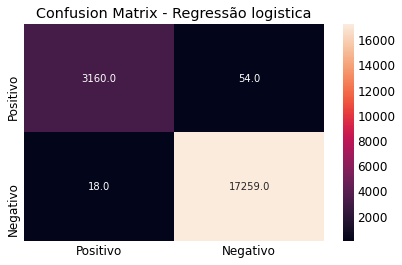

In [68]:
matrix_confusion_3 = confusion_matrix(teste, model_regression_logistic_pred)

ax = plt.subplot()
sns.heatmap(matrix_confusion_3, annot=True, ax = ax, fmt = ".1f"); 

ax.set_xlabel('');
ax.set_ylabel(''); 
ax.set_title('Confusion Matrix - Regressão logistica'); 
ax.xaxis.set_ticklabels(["Positivo", "Negativo"]); ax.yaxis.set_ticklabels(["Positivo", 'Negativo']);

In [69]:
classification = classification_report(teste, model_regression_logistic_pred)
print("Modelo 03 - Regressão logistica")
print()
print(classification)

Modelo 03 - Regressão logistica

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3214
           1       1.00      1.00      1.00     17277

    accuracy                           1.00     20491
   macro avg       1.00      0.99      0.99     20491
weighted avg       1.00      1.00      1.00     20491



In [70]:
precision = precision_score(teste, model_regression_logistic_pred)
Recall = recall_score(teste, model_regression_logistic_pred)
Accuracy = accuracy_score(teste, model_regression_logistic_pred)
F1_Score = f1_score(teste, model_regression_logistic_pred)

precisao = pd.DataFrame({
    
    "Metricas" : ["precision",
                 "Recall", 
                  "Accuracy", 
                  "F1_Score"],
    
    "Resultado": [precision,
                Recall, 
                Accuracy, 
                F1_Score]})

precisao.sort_values(by = "Resultado", ascending = False)

,Metricas,Resultado
1,Recall,0.998958
3,F1_Score,0.997918
0,precision,0.996881
2,Accuracy,0.996486


# Modelo 04 - K-NN

In [71]:
%%time
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
model_knn_fit = model_knn.fit(freq, teste)
model_knn_score = model_knn.score(freq, teste)

print("Modelo - K-NN: %.2f" % (model_knn_score * 100))

Modelo - K-NN: 88.71
Wall time: 1min 8s


In [72]:
# Previsão do modelo do k-nn

model_knn_pred = model_knn.predict(freq)
model_knn_pred

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [74]:
accuracy_knn = accuracy_score(teste, model_knn_pred)

print("Acurácia - K-NN: %.2f" % (accuracy_knn * 100))

Acurácia - K-NN: 88.71


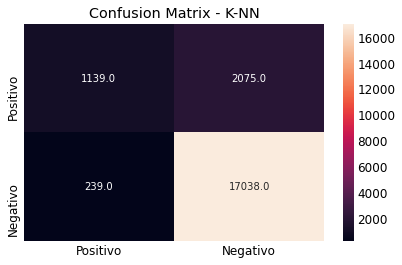

In [76]:
matrix_confusion_3 = confusion_matrix(teste, model_knn_pred)

ax = plt.subplot()
sns.heatmap(matrix_confusion_3, annot=True, ax = ax, fmt = ".1f"); 

ax.set_xlabel('');
ax.set_ylabel(''); 
ax.set_title('Confusion Matrix - K-NN'); 
ax.xaxis.set_ticklabels(["Positivo", "Negativo"]); ax.yaxis.set_ticklabels(["Positivo", 'Negativo']);

In [77]:
classification = classification_report(teste, model_knn_pred)
print("Modelo 04 - K-NN")
print()
print(classification)

Modelo 04 - K-NN

              precision    recall  f1-score   support

           0       0.83      0.35      0.50      3214
           1       0.89      0.99      0.94     17277

    accuracy                           0.89     20491
   macro avg       0.86      0.67      0.72     20491
weighted avg       0.88      0.89      0.87     20491



In [78]:
precision = precision_score(teste, model_knn_pred)
Recall = recall_score(teste, model_knn_pred)
Accuracy = accuracy_score(teste, model_knn_pred)
F1_Score = f1_score(teste, model_knn_pred)

precisao = pd.DataFrame({
    
    "Metricas" : ["precision",
                 "Recall", 
                  "Accuracy", 
                  "F1_Score"],
    
    "Resultado": [precision,
                Recall, 
                Accuracy, 
                F1_Score]})

precisao.sort_values(by = "Resultado", ascending = False)

,Metricas,Resultado
1,Recall,0.986167
3,F1_Score,0.936411
0,precision,0.891435
2,Accuracy,0.887072


# Modelo 05 - Random forest

In [79]:
%%time

from sklearn.ensemble import RandomForestClassifier

model_random_forest = RandomForestClassifier(max_depth = 2, random_state = 0) # max_depth - determinando total de árvore, random_state 0
model_random_forest_fit = model_random_forest.fit(freq, teste) # Dados de treino, teste de x, y
model_random_forest_score = model_random_forest.score(freq, teste) # Valor da Accuracy do algoritmo 

print("Score - Modelo random forest: %.2f" % (model_random_forest_score * 100))

Score - Modelo random forest: 84.32
Wall time: 9.06 s


In [80]:
# Previsão do modelo

model_random_forest_regressor_pred = model_random_forest.predict(freq)
model_random_forest_regressor_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [81]:
accuracy_random_forest = accuracy_score(teste, model_random_forest_regressor_pred)
print("Accuracy - Random forest: %.2f" % (accuracy_random_forest * 100))

Accuracy - Random forest: 84.32


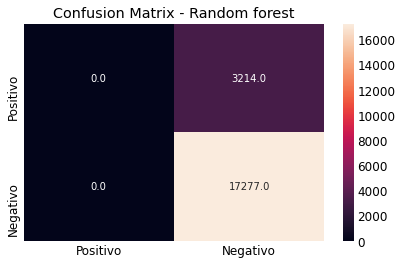

In [83]:
matrix_confusion_4 = confusion_matrix(teste, model_random_forest_regressor_pred)

ax = plt.subplot()
sns.heatmap(matrix_confusion_4, annot=True, ax = ax, fmt = ".1f"); 

ax.set_xlabel('');
ax.set_ylabel(''); 
ax.set_title('Confusion Matrix - Random forest'); 
ax.xaxis.set_ticklabels(["Positivo", "Negativo"]); ax.yaxis.set_ticklabels(["Positivo", 'Negativo']);

In [85]:
from sklearn.metrics import classification_report

classification = classification_report(teste, model_random_forest_regressor_pred)
print("Modelo 05 - Random forest")
print()
print(classification)

Modelo 05 - Random forest

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3214
           1       0.84      1.00      0.91     17277

    accuracy                           0.84     20491
   macro avg       0.42      0.50      0.46     20491
weighted avg       0.71      0.84      0.77     20491



In [86]:
precision = precision_score(teste, model_random_forest_regressor_pred)
Recall = recall_score(teste, model_random_forest_regressor_pred)
Accuracy = accuracy_score(teste, model_random_forest_regressor_pred)
F1_Score = f1_score(teste, model_random_forest_regressor_pred)

precisao = pd.DataFrame({
    
    "Metricas" : ["precision",
                 "Recall", 
                  "Accuracy", 
                  "F1_Score"],
    
    "Resultado": [precision,
                Recall, 
                Accuracy, 
                F1_Score]})

precisao.sort_values(by = "Resultado", ascending = False)

,Metricas,Resultado
1,Recall,1.000000
3,F1_Score,0.914902
0,precision,0.843151
2,Accuracy,0.843151


# Modelo 06 - XGBOOST

In [87]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb_fit = xgb.fit(freq, teste)
xgb_score = xgb.score(freq, teste)

print("Modelo - XGBoost: %.2f" % (xgb_score * 100))

[15:53:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Modelo - XGBoost: 98.01


In [88]:
xgb_pred = xgb.predict(freq)
xgb_pred

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [90]:
accuracy_XGBoost = accuracy_score(teste, xgb_pred)
print("Accuracy - XGBoost: %.2f" % (accuracy_XGBoost * 100))

Accuracy - XGBoost: 98.01


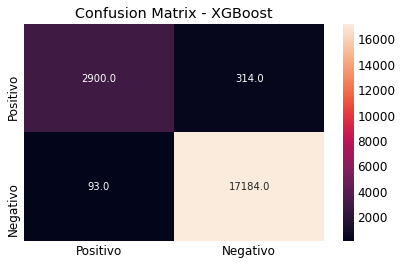

In [92]:
matrix_confusion_4 = confusion_matrix(teste, xgb_pred)

ax = plt.subplot()
sns.heatmap(matrix_confusion_4, annot=True, ax = ax, fmt = ".1f"); 

ax.set_xlabel('');
ax.set_ylabel(''); 
ax.set_title('Confusion Matrix - XGBoost'); 
ax.xaxis.set_ticklabels(["Positivo", "Negativo"]); ax.yaxis.set_ticklabels(["Positivo", 'Negativo']);

In [93]:
from sklearn.metrics import classification_report

classification = classification_report(teste, xgb_pred)
print("Modelo 05 - Random forest")
print()
print(classification)

Modelo 05 - Random forest

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      3214
           1       0.98      0.99      0.99     17277

    accuracy                           0.98     20491
   macro avg       0.98      0.95      0.96     20491
weighted avg       0.98      0.98      0.98     20491



In [94]:
precision = precision_score(teste, xgb_pred)
Recall = recall_score(teste, xgb_pred)
Accuracy = accuracy_score(teste, xgb_pred)
F1_Score = f1_score(teste, xgb_pred)

precisao = pd.DataFrame({
    
    "Metricas" : ["precision",
                 "Recall", 
                  "Accuracy", 
                  "F1_Score"],
    
    "Resultado": [precision,
                Recall, 
                Accuracy, 
                F1_Score]})

precisao.sort_values(by = "Resultado", ascending = False)

,Metricas,Resultado
1,Recall,0.994617
3,F1_Score,0.988296
0,precision,0.982055
2,Accuracy,0.980138


# Resultado final

In [98]:
# Resultados - Modelos machine learning

modelos = pd.DataFrame({
    
    "Models" :["Regressão logistica", 
                "K-NN", 
                "Random Forest", 
                "Decision Tree",
                "Naive Bayes",
                "XGBoost"],

    "Acurácia" :[accuracy_naive_bayes_multinomialNB, 
                      acuracia_decision_tree, 
                      acuracia_LogisticRegression, 
                      accuracy_knn,
                      accuracy_random_forest,
                      accuracy_XGBoost]})

modelos.sort_values(by = "Acurácia", ascending = True)

,Models,Acurácia
4,Naive Bayes,0.843151
3,Decision Tree,0.887072
0,Regressão logistica,0.954809
5,XGBoost,0.980138
1,K-NN,0.996486
2,Random Forest,0.996486


# Pipeline dos dados

In [99]:
from sklearn.model_selection import cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn import svm

pipeline = Pipeline([
    ("counts", CountVectorizer()),
    ("classifier", MultinomialNB())
])

pipeline_svm = Pipeline([
    ("counts", CountVectorizer(tokenizer=lambda text: neg(text))),
    ("classifier", svm.SVC(kernel="linear"))
])

result_pipeline = cross_val_predict(pipeline, treino, teste, cv = 10)
result_pipeline

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [111]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

acuracia = metrics.accuracy_score(result_pipeline, teste)
matrix = confusion_matrix(result_pipeline, teste)

In [101]:
print("Accuracy - Pipeline: %.2f" % (acuracia * 100))

Accuracy - Pipeline: 92.39


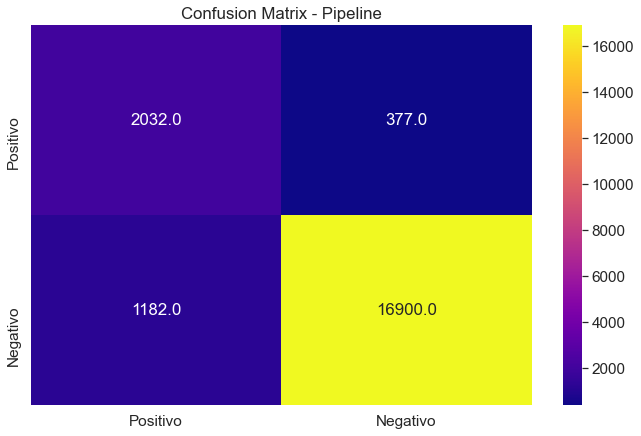

In [115]:
plt.figure(figsize = (10,7))
ax = plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax, fmt = ".1f", cmap = 'plasma'); 

ax.set_xlabel('');
ax.set_ylabel(''); 
ax.set_title('Confusion Matrix - Pipeline'); 
ax.xaxis.set_ticklabels(["Positivo", "Negativo"]); ax.yaxis.set_ticklabels(["Positivo", 'Negativo']);

In [116]:
sentimento=['Positivo',
            'Negativo']

print(pd.crosstab(teste, result_pipeline, rownames = ['Real'], colnames = ['Predito'], margins = True))

Predito     0      1    All
Real                       
0        2032   1182   3214
1         377  16900  17277
All      2409  18082  20491


In [118]:
## Salvando modelo M.L PLN

import pickle
 
with open('naive_bayes_predict.pkl', 'wb') as file:
    pickle.dump(naive_bayes_predict, file)

with open('modelo_arvore_cla_1_predict.pkl', 'wb') as file:
    pickle.dump(modelo_arvore_cla_1_predict, file)

with open('model_regression_logistic_pred.pkl', 'wb') as file:
    pickle.dump(model_regression_logistic_pred, file)

with open('model_knn_pred.pkl', 'wb') as file:
    pickle.dump(model_knn_pred, file)

with open('model_random_forest_regressor_pred.pkl', 'wb') as file:
    pickle.dump(model_random_forest_regressor_pred, file)

with open('xgb_pred.pkl', 'wb') as file:
    pickle.dump(xgb_pred, file)

with open('result_pipeline.pkl', 'wb') as file:
    pickle.dump(result_pipeline, file)